### We have data on Salary and years of Experience of a group of employees of an organization. We will build a predictive model which will predict the salary of an employee once we feed in the years of experience for a new employee.

##### Basic assumptions of Classical Linear Regression Models:

* A linear relationship between the dependent and Independent variable
* The Independent variables should not have mutual correlation among each other
* Error terms should be uncorrelated and follow a normal distribution

In [68]:
#loading the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


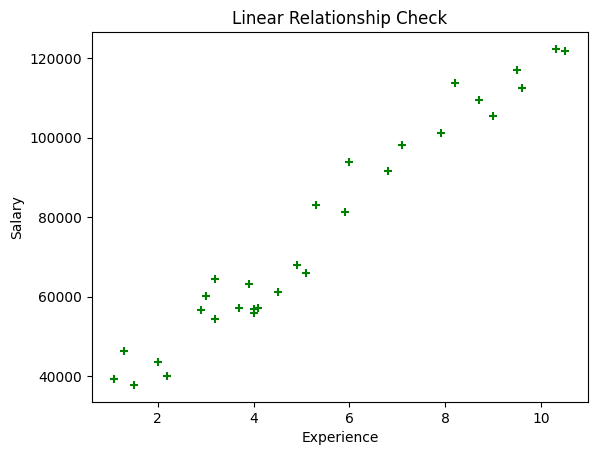

In [72]:
####assumption of linearity:
plt.scatter(salary.YearsExperience,salary.Salary,color='green',marker='+') ###scatter generates the scatterplot,markers highlight the (x,y) combinations.
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Linear Relationship Check')
plt.show()

In [73]:
salary.shape

(30, 2)

In [76]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [77]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [80]:
X=salary.iloc[:,:-1]
y=salary.iloc[:,-1]

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50)

In [84]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()

In [86]:
### train the model on training data:
slr.fit(X_train,y_train)

LinearRegression()

In [88]:
pred=slr.predict(X_test)

In [90]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
r2

0.8824679635169839

#### SSR,ESS are statistical techniques to determine how well the model fits the actual values. 
-In other words,the Rsquare/goodness of fit is determined by SSR and ESS. 
- SSR- it measures the deviation of y_pred from the mean of actual values,
- and ESS measures the deviation of the y_pred(predicted values) from the actual values.
- Lesser the values of RSS and ESS,lower is the deviation of predicted values from the actual values.
- A ideal case is where actuals and predicted values match.
-  ESS(Explained sum of squares-variance in the y values due to the model),
-  RSS( variance in the y values due to other reasons).
-  TSS(total sum of squares-total variance in y values is the sum of ESS and RSS).
-  R2=1-RSS/TSS(Variance of the dependent variable y as explained by the model.

#### R squares measures the goodness of fit. 
- closer it is to 1 better is the model,and
- closer to 0 implies the model is not a good fit to the actual values.
-  If the model is not a good fit,it implies the model cannot predict the actual values of y.

In [94]:
deviation=[[y_test-pred]]
deviation

[[17     8149.414489
  8      9410.646206
  28       61.386589
  9     -2584.456584
  18      737.491141
  19    12366.670583
  Name: Salary, dtype: float64]]

In [38]:
slr.coef_   #estimated value of beta1

array([9478.20557998])

In [40]:
slr.intercept_   #predicted value of beta0

24704.09593760129

In [42]:
#### I want the model to predict on new data:
slr.predict([[15]])

C:\Users\aishw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([166877.17963731])

In [44]:
#y(hat)=b0(hat)+b1(hat)*x+error  -->equation of slr

In [46]:
24704.095937601305+9478.20557998*15

166877.1796373013

Text(0.5, 1.0, 'Simple Linear regression model')

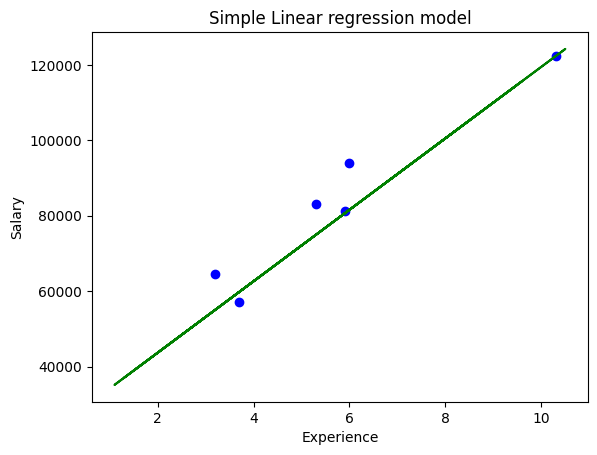

In [48]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,slr.predict(X_train),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Simple Linear regression model')

In [49]:
df=pd.read_csv('Experience.csv')

In [52]:
df.head()

,YearsExperience
0,2.1
1,1.3
2,1.6
3,2.2
4,3.2


In [54]:
pred_new = slr.predict(df)

In [56]:
pred_new

array([ 44608.32765556,  37025.76319158,  39869.22486557,  45556.14821356,
        55034.35379354,  52190.89211954,  59773.45658353,  63564.73881552,
        86312.43220747,  97686.27890345, 121381.7928534 ,  63564.73881552,
       110007.94615743,  82521.14997548, 114747.04894742])

In [58]:
df['predicted_Salaries'] = pred_new

In [60]:
df

,YearsExperience,predicted_Salaries
0,2.1,44608.327656
1,1.3,37025.763192
2,1.6,39869.224866
3,2.2,45556.148214
4,3.2,55034.353794
5,2.9,52190.892120
6,3.7,59773.456584
7,4.1,63564.738816
8,6.5,86312.432207
9,7.7,97686.278903


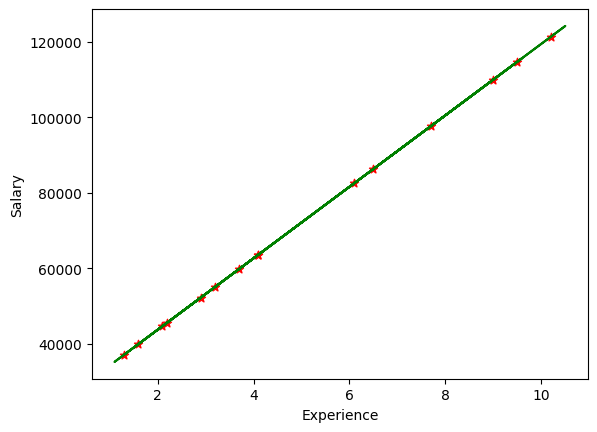

In [108]:
plt.scatter(df.YearsExperience,df.predicted_Salaries,color='red',marker='*')

plt.plot(X_train,slr.predict(X_train),color='green')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()